In [1]:
#2021.06.10. THUR 
#Hankyeong

##Project 5: NLTK를 이용하여 Wordcloud 만들기. 
#00-1. NLTK(Natural Language tool kit) 설치 추가 킷 다운로드하기.  
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

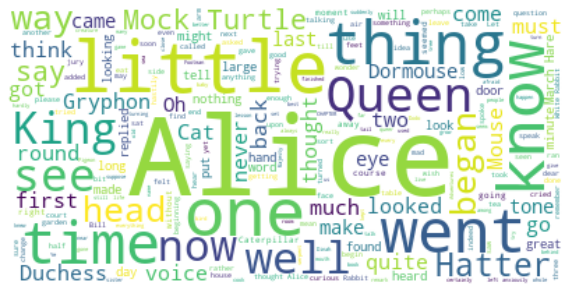

In [2]:
#00-2. 패키지 호출 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import random

#01. Alice in wonderland
#(1) 데이터셋 불러오기. 
with open('../../data/Alice.txt','r') as f :
    text = f.read()

#(2) 불용어 지정 및 추가하기. 
stopwords = set(STOPWORDS)
stopwords.add("said")

#(3) 워드클라우드 설정하기. 
wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)
wc = wc.generate(text)

#(4) 단어의 출력빈도 빈도 확인하기. 
keys = list(wc.words_.keys())
values = list(wc.words_.values())

#(5) 워드클라우드 생성하기. 
plt.figure(figsize=(10,6))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

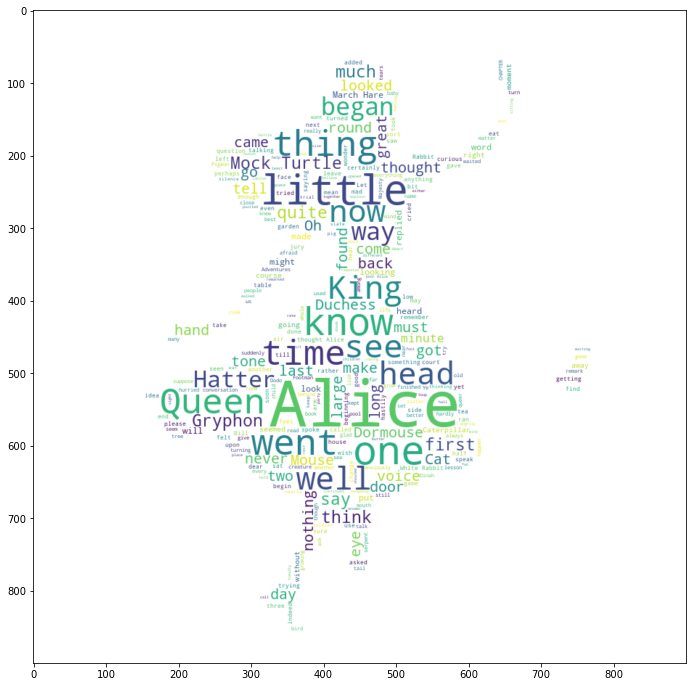

In [3]:
#PLUS. 그림 위에 표시하기. 
mask = np.array(Image.open('../../data/Alice_mask.png'))
wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords, mask=mask)
wc = wc.generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wc, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis=('off')
plt.show()

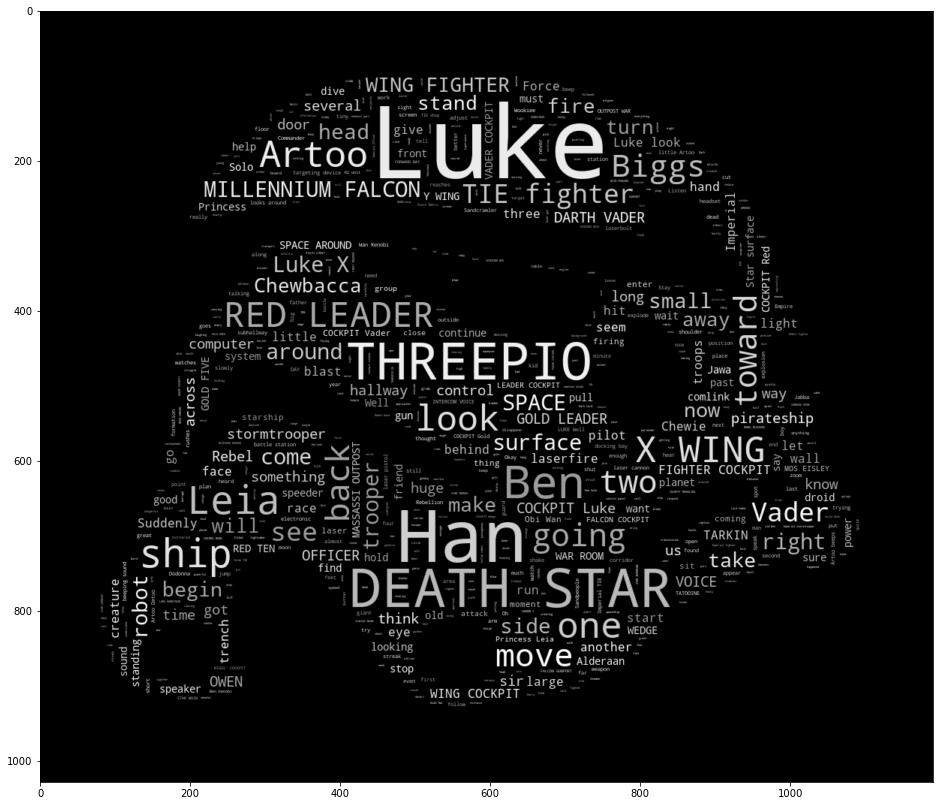

In [4]:
#02. Starwars
#(1) 텍스트 데이터 불러오기 및 단어 대체하기. 
with open('../../data/A_new_hope.txt','r') as f:
    text = f.read()
text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')
mask = np.array(Image.open('../../data/Stormtrooper_mask.png'))

#(2) 불용어 설정하기. 
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

#(3) 워드클라우드 설정하기. 
wc = WordCloud(max_words=1000, mask=mask,
               stopwords=stopwords, margin=10,
               random_state=1).generate(text)
default_colors = wc.to_array()

#(4) 워드클라우드의 텍스트 색 배정하기. 
def grey_color(word, font_size, position,
               orientation, random_state=None,
               **kwargs):
    # return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)     
    # hue, saturation, lightness
    return f'hsl(0, 0%, {random.randint(60,100)}%)'

#(5) 그림 위에 표시하기. 
plt.figure(figsize=(16,16))
plt.imshow(wc.recolor(color_func=grey_color, random_state=3), interpolation='bilinear')
plt.axis=('off')
plt.show()